In [1]:
import win32com.client

## Introduction to HECRAS Controller

## Running a steady model

In [2]:
#import os
import win32com.client
import numpy as np
import pandas as pd
#from support import sc1_ShowNodes

In [3]:
#Add obkect mod and open function controller
RC = win32com.client.Dispatch("RAS507.HECRASController")
RC.ShowRas()  

In [4]:
#Open project
RC.Project_Open(r"C:/Users/juan.guerrero/Juan/dev/apuntes/Examenes/Data Examen 3/Ex_4/Model/test02/s7.prj")

In [5]:
#river=RC.Geometry_GetRivers(None, None)
#reach=RC.Geometry_GetReaches(1,None, None)
#nodes=RC.Geometry_GetNodes(1,1,None, None, None)
#nodes=list(nodes)

In [6]:
#Indetify geometry
river=RC.Geometry_GetRivers()[1][0]
reach=RC.Geometry_GetReaches(1)[2][0]
nodes=RC.Geometry_GetNodes(1,1)[3]
nodes=list(nodes)

In [7]:
#Identify coefficient rugosity
Mann_chan=round(np.random.uniform(0.4,0.8),3)
Mann_bank=round(np.random.uniform(0.4,0.8),3)

In [8]:
Mann_chan
#Mann_bank

0.451

In [9]:
for i in range(19):
    Var_Mann=RC.Geometry_SetMann_LChR(river,reach,nodes[i],Mann_bank,Mann_chan,Mann_bank)
    print(Var_Mann)

(True, 'River 1         ', 'Reach 1         ', '3909    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '3665    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '3419    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '3203    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '2988    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '2753    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '2528    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, 'River 1         ', 'Reach 1         ', '2330    ', 0.7149999737739563, 0.45100000500679016, 0.7149999737739563, '')
(True, '

In [10]:
#Execute model
Simulation=RC.Compute_CurrentPlan(None,None,True)

In [11]:
#Extract results
water_list,flow_list,veloc_list =[],[],[]

In [12]:
for i in range(19):
    water=RC.Output_NodeOutput(1,1,i+1,None,1,2)[0]
    flow=RC.Output_NodeOutput(1,1,i+1,None,1,9)[0]
    veloc=RC.Output_NodeOutput(1,1,i+1,None,1,23)[0]
    water_list.append(water),flow_list.append(flow),veloc_list.append(veloc)

In [13]:
water_list

[2449.531005859375,
 2449.40234375,
 2449.190673828125,
 2449.1015625,
 2448.945068359375,
 2448.53125,
 2448.36962890625,
 2447.81396484375,
 2446.983642578125,
 2446.699462890625,
 2445.612060546875,
 2445.1416015625,
 2444.929931640625,
 2444.669921875,
 2444.3076171875,
 2444.122802734375,
 2444.027587890625,
 2443.93603515625,
 2443.74169921875]

In [14]:
#Display results of water elevation, flow and velocity
output={'Cross Sections':nodes,'Water Surface Elevation(m)':water_list,'Flow(m³/s)':flow_list,'Velocities(m/s)':veloc_list}
df=pd.DataFrame(output)
df.set_index('Cross Sections')

,Water Surface Elevation(m),Flow(m³/s),Velocities(m/s)
Cross Sections,,,
3909,2449.531006,49.999992,0.103504
3665,2449.402344,49.999992,0.199584
3419,2449.190674,49.999992,0.146316
3203,2449.101562,49.999992,0.100740
2988,2448.945068,49.999992,0.310819
2753,2448.531250,49.999992,0.174302
2528,2448.369629,49.999992,0.121431
2330,2447.813965,49.999992,1.801748
2059,2446.983643,49.999992,0.155094


In [15]:
#Import plot libraries
import matplotlib
import matplotlib.pyplot as plt

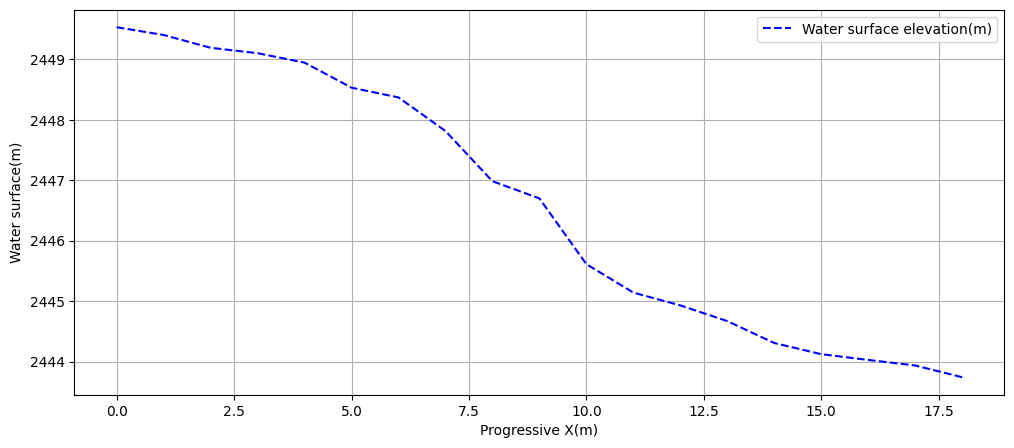

In [16]:
#Plot results
#print("Water surface elevation= ", water_list)
plt.figure(figsize=(12,5))
plt.plot(water_list, linestyle="--", color ="b", label = "Water surface elevation(m)")
plt.grid(True)
plt.xlabel('Progressive X(m)')
plt.ylabel('Water surface(m)')
plt.legend(loc="best")

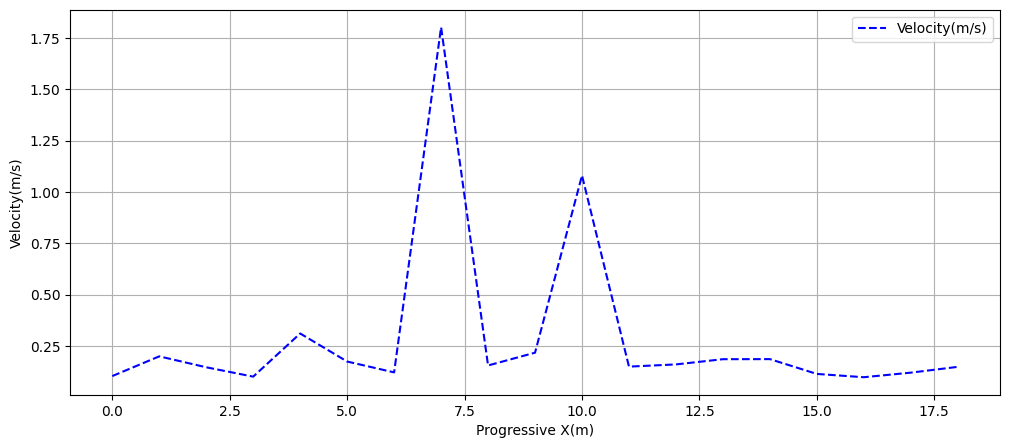

In [17]:
#Plot results
plt.figure(figsize=(12,5))
plt.plot(veloc_list, linestyle="--", color ="b", label = "Velocity(m/s)")
plt.grid(True)
plt.xlabel('Progressive X(m)')
plt.ylabel('Velocity(m/s)')
plt.legend(loc="best")